In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import stochpy


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

$J = \kappa(S_6 - S^{ex}_6)$ 

$\kappa = A \cdot P/V_c$

$\dot{S_1} = J_0 - v_1$ $\Longrightarrow$ $\dfrac{dS_1}{dt} = J_0 - v_1$

$\dot{S_2} = v_1 - v_2$ $\Longrightarrow$ $\dfrac{dS_2}{dt} = v_1 - v_2$

$\dot{S_3} = 2v_2 - v_3 - v_8$  $\Longrightarrow$ $\dfrac{dS_3}{dt} = 2v_2 - v_3 - v_8$

$\dot{S_4} = v_3 - v_4$  $\Longrightarrow$ $\dfrac{dS_4}{dt} = v_3 - v_4$

$\dot{S_5} = v_4 - v_5$  $\Longrightarrow$ $\dfrac{dS_5}{dt} = v_4 - v_5$

$\dot{S_6} = v_5 - v_6 - J$  $\Longrightarrow$ $\dfrac{dS_6}{dt} = v_5 - v_6 - J$
 
$\dot{S^{ex}_6} = \varphi J - v_9$  $\Longrightarrow$ $\dfrac{dS^{ex}_6}{dt} = \varphi J - v_9$

$\dot{A_3} = -2v_1 + v_3 + v_4 - v_7$  $\Longrightarrow$ $\dfrac{dA_3}{dt} = -2v_1 + v_3 + v_4 - v_7$

$\dot{N_2} = v_3 - v_6 - v_8$  $\Longrightarrow$ $\dfrac{dN_2}{dt} = v_3 - v_6 - v_8$

$J_0 = constant$

$v_1 = k_1 S_1 A_3 f(A_3)$

$v_2 = k_2S_2$

$v_3 = \dfrac{k_{GAPDH+}k_{PGK+}S_3N_1(A - A_3) - k_{GAPDH-}k_{PGK-}S_4A_3N_2}{k_{GAPDH-}N_2 + k_{PGK+}(A - A_3)}$

$v_4 = k_4S_4(A - A_3)$

$v_5 = k_5S_5$

$v_6 = k_6S_6N_2$

$v_7 = k_7A_3$

$v_8 = k_8S_3N_2$ 

$v_9 = k_9S^{ex}_6$

In [2]:
J0 = 50
k1 = 550
Ki = 1
k2 = 9.8
kGp = 323.8
kGm = 57823.1
kPp = 76411.1
kPm = 23.7
k4 = 80
k5 = 9.7
k6 = 2000.0
k7 = 28.0
k8 = 85.7
kappa = 375.0
phi = 0.1
A = 4.0
N = 1.0
n = 4

In [3]:
k9 = 80.0 # oscillation
#k9 = 0.1 ## steady state(longer time)
#k9 = 2 ## Hopf state?
#k9 = 8

In [4]:
def nine_variable(y, t):

    # y[0] to y[8] are respectively: 
    # (0)S1; (1)S2; (2)S3; (3)S4; (4)S5; (5)S6; (6)Sex6 (7)A3 (8)N2
    dydt = np.empty(len(y))

    J = kappa * (y[5] - y[6])
    fA3 = (1 + (y[7]/Ki)**n)**-1
    v1 = k1 * y[0] * y[7] * fA3
    v2 = k2 * y[1]
    v3 = (kGp * kPp * y[2] * (N - y[8]) * (A - y[7]) - kGm * kPm * y[3] * y[7] * y[8]) / (kGm * y[8] + kPp * (A - y[7]))
    v4 = k4 * y[3] * (A - y[7])
    v5 = k5 * y[4]
    v6 = k6 * y[5] * y[8]
    v7 = k7 * y[7]
    v8 = k8 * y[2] * y[8]
    v9 = k9 * y[6]
    
    
# dydt[0] to dydt[8] are respectively: 
# (0)dS1/dt; (1)dS2/dt; (2)dS3/dt; (3)dS4/dt;
# (4)dS5/dt; (5)dS6/dt; (6)dSex6/dt; (7)dA3/dt; 
# (8)dN2/dt
    dydt[0] = J0 - v1
    dydt[1] = v1 - v2
    dydt[2] = 2 * v2 - v3 - v8
    dydt[3] = v3 - v4
    dydt[4] = v4 - v5
    dydt[5] = v5 - v6 - J
    dydt[6] = phi * J - v9
    dydt[7] = -2 * v1 + v3 + v4 - v7
    dydt[8] = v3 - v6 - v8

    return dydt

In [92]:
t = np.linspace(0, 2, 1001)
y0= np.array([1,1,1,1,1,1,1,1,1])

In [93]:
y_test = odeint(nine_variable, y0, t) 

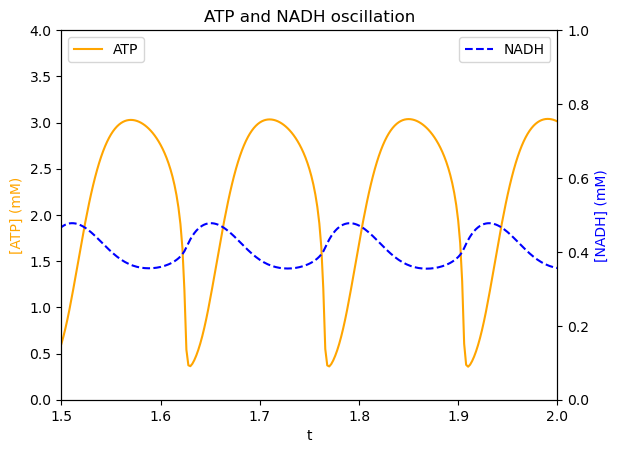

In [96]:
fig = plt.figure()

ATP = fig.add_subplot(111)
ATP.plot(t, y_test[:, 7], "orange", label = "ATP")
ATP.set_ylabel("[ATP] (mM)", color = 'orange')
ATP.set_title("ATP and NADH oscillation")
ATP.set_xlabel("t")
plt.ylim([0, 4])
plt.legend(loc = 2)

NADH = ATP.twinx()
NADH.plot(t, y_test[:, 8], 'b--', label = "NADH")
NADH.set_ylabel("[NADH] (mM)", color = 'b')
plt.ylim([0, 1])

plt.xlim([1.5, 2])
plt.legend(loc = 1)
plt.show()

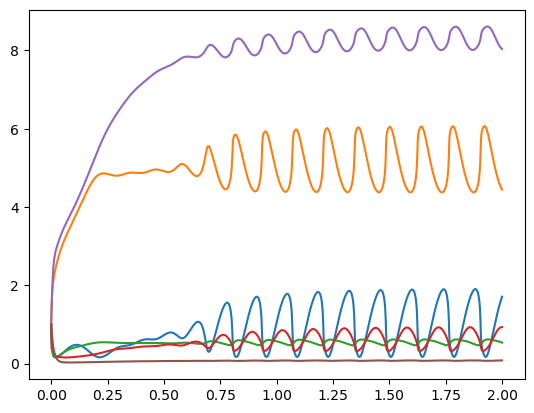

In [100]:
plt.figure()
plt.plot(t, y_test[:, 0])
plt.plot(t, y_test[:, 1])
plt.plot(t, y_test[:, 2])
plt.plot(t, y_test[:, 3])
plt.plot(t, y_test[:, 4])
plt.plot(t, y_test[:, 5])
plt.show()

In [63]:
from scipy.fftpack import fft, fftfreq
fft_series = fft(y_test[100:, 7])
#plt.figure()
#plt.plot(fft_series)
power = np.abs(fft_series)
sample_freq = fftfreq(fft_series.size)

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powers = power[pos_mask]

top_k_seasons = 1
top_k_idxs = np.argpartition(powers, -top_k_seasons)[-top_k_seasons:]
top_k_power = powers[top_k_idxs]
fft_periods = (1 / freqs[top_k_idxs]).astype(int)

print(f"top_k_power: {top_k_power}")
print(f"fft_periods: {fft_periods[0]}")
print(f"period of the oscillation: {1/fft_periods}")

top_k_power: [361.37358046]
fft_periods: 69
period of the oscillation: [0.01449275]


假设1：
两细胞的初始状态会不会影响细胞之间的同步

假设2：
不同酵母细胞只有保证相同的J值才能保证这一震荡的同步。
不同的J（kappa）不同会不会影响细胞的同步！
**假设有一种药物可以改变酵母细胞的通透性， 假设这时细胞之间的同步无法维持**
##在J改变的情况下（细胞通透性改变，表面积和体积比改变的情况下，J0（葡萄糖流入速度）会不会也会发生改变）：考虑并提及，不作过深的讨论

由于不同酵母细胞的反应链完全相同，不进行严谨的推算（建模，或者公式、实验的推算），仅观察模型的反应链，我们可以假设NADH的同步源于细胞内乙醛和细胞外乙醛交换速率（J0）的相同决定。


假设：
